In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("Mall_Customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [7]:
print(len(df['CustomerID'].unique()))

200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df=df.drop(['CustomerID'],axis=1)

In [10]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'SpendScore'},inplace=True)

In [11]:
df.head()

,Gender,Age,Income,SpendScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [12]:
df.describe()

,Age,Income,SpendScore
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [13]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

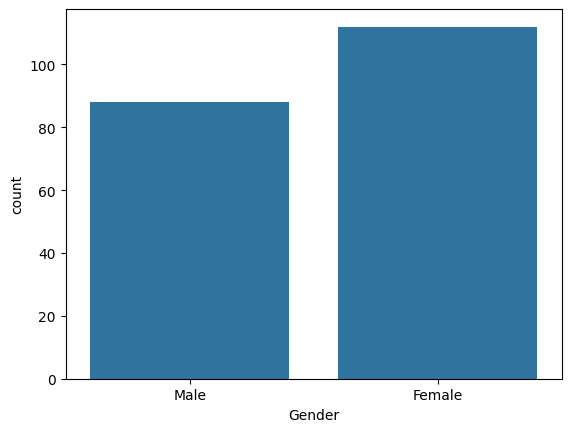

In [14]:
label=['Female','Male']
color=['Pink','Blue']
sns.countplot(data=df,x="Gender")

Text(0, 0.5, 'Spendscore')

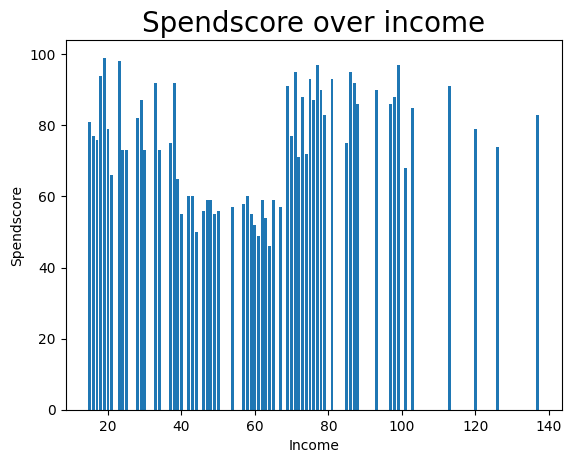

In [15]:
plt.bar(df['Income'],df['SpendScore'])
plt.title('Spendscore over income',fontsize=20)
plt.xlabel('Income')
plt.ylabel('Spendscore')

In [16]:
x=df.iloc[:,[2,3]]

In [17]:
print(type(x))
print(x[:5])

<class 'pandas.core.frame.DataFrame'>
   Income  SpendScore
0      15          39
1      15          81
2      16           6
3      16          77
4      17          40


In [18]:
x=x.values

In [19]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=5,min_samples=6,metric='euclidean')
model=db.fit(x)
label=model.labels_

In [20]:
from sklearn import metrics


n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 4


In [21]:
y_means = db.fit_predict(x)

In [22]:
y_means == 0, 0

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False, False, False,
      

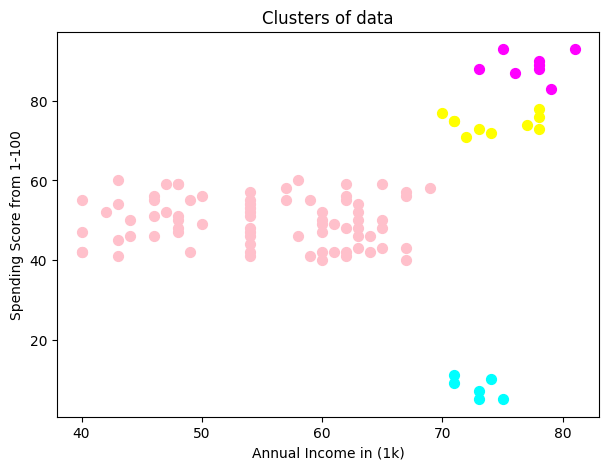

In [23]:
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()

In [24]:
silhouette_score_dbscan = metrics.silhouette_score(x, y_means)
print("Silhouette Score for DBSCAN: ", silhouette_score_dbscan)

Silhouette Score for DBSCAN:  0.06353533083993718


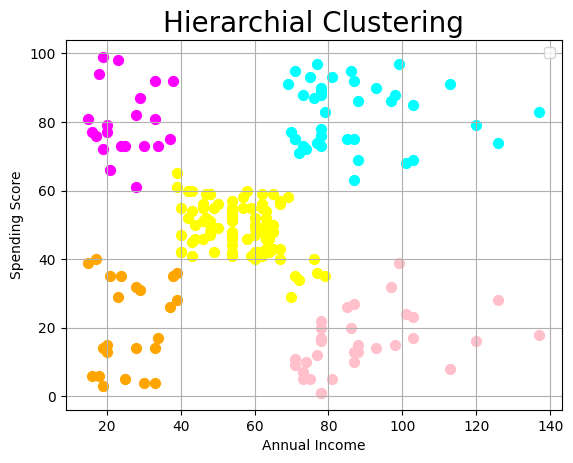

In [26]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_hc == 5, 0], x[y_hc == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_hc == 6, 0], x[y_hc == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_hc == 7, 0], x[y_hc == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_hc == 8, 0], x[y_hc == 8, 1], s = 50, c = 'violet')


plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [27]:
silhouette_score_hc = metrics.silhouette_score(x, y_hc)
print("Silhouette Score for Hierarchical Clustering: ", silhouette_score_hc)

Silhouette Score for Hierarchical Clustering:  0.5529945955148897


In [29]:
import numpy as np

silhouette_scores = []
for n_clusters in range(2, 15):
  hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
  y_hc = hc.fit_predict(x)
  silhouette_scores.append(metrics.silhouette_score(x, y_hc))

In [31]:
optimal_n_clusters = np.argmax(silhouette_scores) + 2  
print("Optimal number of clusters:", optimal_n_clusters)


hc = AgglomerativeClustering(n_clusters=optimal_n_clusters, linkage='ward')
y_hc = hc.fit_predict(x)

silhouette_score_hc = metrics.silhouette_score(x, y_hc)
print("Silhouette Score for Hierarchical Clustering: ", silhouette_score_hc)

Optimal number of clusters: 5
Silhouette Score for Hierarchical Clustering:  0.5529945955148897


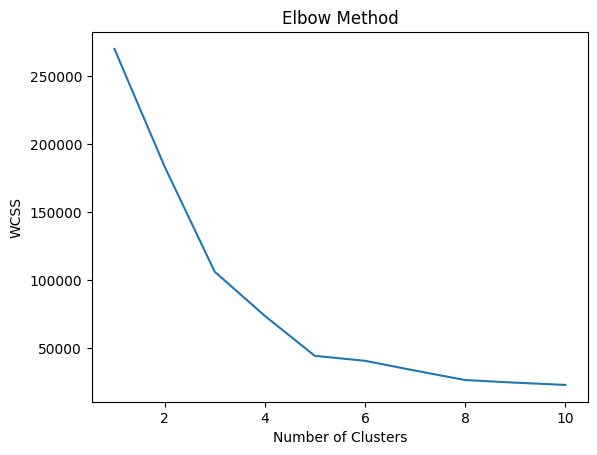

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

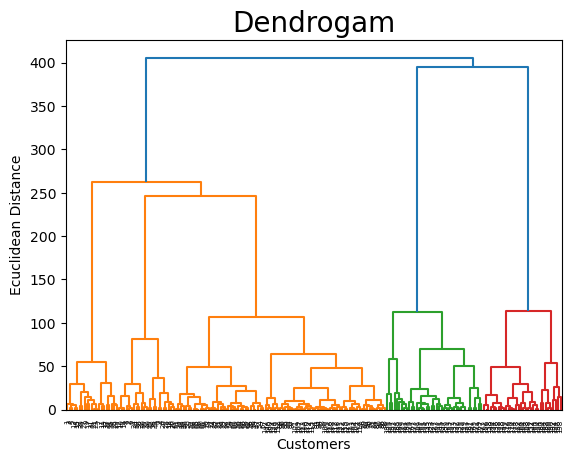

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

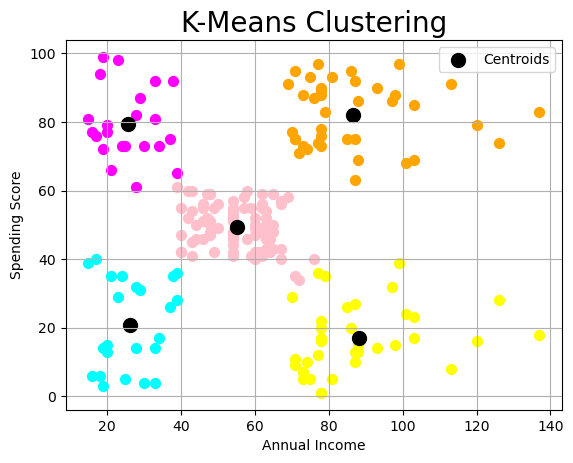

Silhouette Score for K-Means:  0.553931997444648


In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)

# Visualize the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=50, c='pink')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=50, c='yellow')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=50, c='cyan')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=50, c='magenta')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s=50, c='orange')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')

plt.title('K-Means Clustering', fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

# Calculate Silhouette Score for K-Means
silhouette_score_kmeans = metrics.silhouette_score(x, y_kmeans)
print("Silhouette Score for K-Means: ", silhouette_score_kmeans)

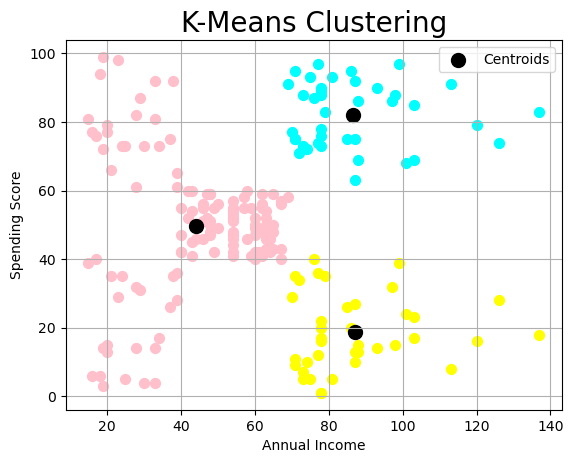

Silhouette Score for K-Means:  0.46761358158775435


In [ ]:

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=50, c='pink')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=50, c='yellow')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=50, c='cyan')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=50, c='magenta')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s=50, c='orange')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')

plt.title('K-Means Clustering', fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()


silhouette_score_kmeans = metrics.silhouette_score(x, y_kmeans)
print("Silhouette Score for K-Means: ", silhouette_score_kmeans)